## Ryan et al. 1991 v Atkin et al. 2017 Respiration models

### SP mode 

### Load libraries

In [1]:
import numpy as np
import xarray as xr
import csv
import pandas as pd

import functions_py.fates_xarray_functions as fa

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import cartopy.crs as ccrs
from matplotlib import cm
from matplotlib.colors import Normalize

### Plotting options

In [2]:
min_lat_plotting = -90
max_lat_plotting = 90
min_lon_plotting = -180
max_lon_plotting = 180
geog_range_plotting = [min_lon_plotting, max_lon_plotting, min_lat_plotting, max_lat_plotting]

pfts = ['broadleaf_evergreen_tropical_tree','needleleaf_evergreen_extratrop_tree',
         'needleleaf_colddecid_extratrop_tree','broadleaf_evergreen_extratrop_tree',
        'broadleaf_hydrodecid_tropical_tree','broadleaf_colddecid_extratrop_tree',
        'broadleaf_evergreen_extratrop_shrub','broadleaf_hydrodecid_extratrop_shrub',
        'broadleaf_colddecid_extratrop_shrub', 'arctic_c3_grass',
        'cool_c3_grasss','c4_grass']


# colours for canopy/understory and FATES/Data
dark = cm.get_cmap('Paired', 12)
colormap = dark(range(12))

### Load FATES runs

In [3]:
# Default respiration model
fates_history_file_def = '/compyfs/need138/elm_runs/spmode_ryan_mr.Ec63cce2-F612413c.2022-11-08/run/lnd/hist/spmode_ryan_mr.Ec63cce2-F612413c.2022-11-08.elm.h0.fullrun.nc'
fates_def = xr.open_dataset(fates_history_file_def,  decode_times=False)
nyears = int(len(fates_def.variables['time'])/12)
n_lat = len(fates_def.variables['lat'])
n_lon = len(fates_def.variables['lon'])

tave_start = (nyears-5)*12
tave_stop = nyears*12

cohort_size_bins = fates_def.variables['fates_levscls'][:]
nsizebins = len(cohort_size_bins)

# NB fates coords are from -90 to 90 and 0 to 180

# New respiration model
fates_new = '/compyfs/need138/elm_runs/spmode_atkin_mr.Ec63cce2-F612413c.2022-11-08/run/lnd/hist/spmode_atkin_mr.Ec63cce2-F612413c.2022-11-08.elm.h0.fullrun.nc'
fates_new = xr.open_dataset(fates_new, decode_times=False)


### NPP, GPP and NPP/GPP 

''

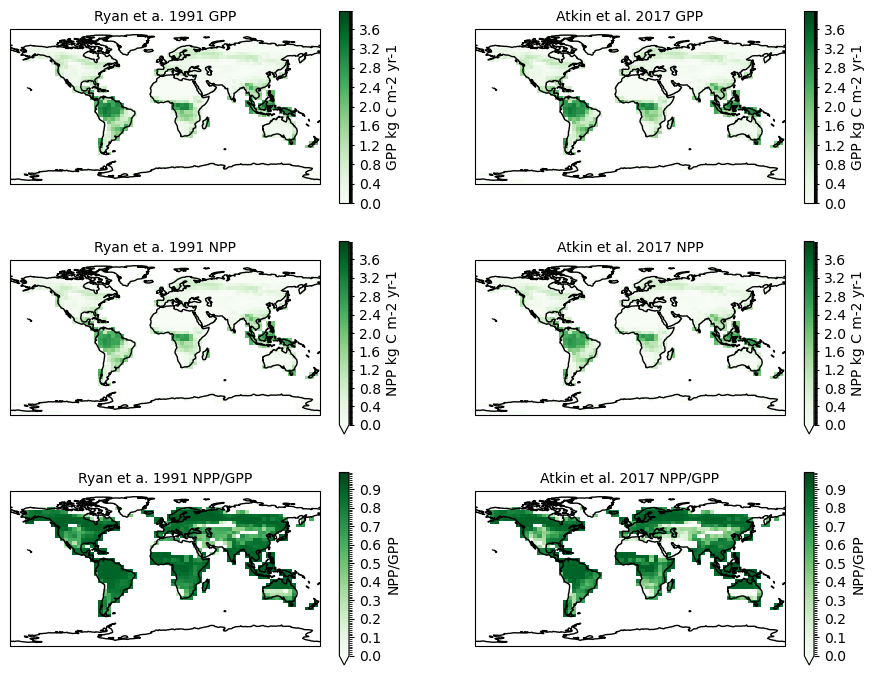

In [4]:
gpp_def = fates_def.FATES_GPP.isel(time=slice(tave_start,tave_stop)).mean(dim='time') * 86400 * 365
npp_def = fates_def.FATES_NPP.isel(time=slice(tave_start,tave_stop)).mean(dim='time') * 86400 * 365
npp_gpp_def  = npp_def/gpp_def

gpp_new = fates_new.FATES_GPP.isel(time=slice(tave_start,tave_stop)).mean(dim='time') * 86400 * 365
npp_new = fates_new.FATES_NPP.isel(time=slice(tave_start,tave_stop)).mean(dim='time') * 86400 * 365
npp_gpp_new  = npp_new/gpp_new


fig, axs = plt.subplots(nrows=3,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(11,8.5))

clevs = np.arange(0.,4,0.01)
axs=axs.flatten()

gpp_def.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Greens',
         cbar_kwargs={"label": "GPP kg C m-2 yr-1"}, ax=axs[0])
axs[0].coastlines()
axs[0].set_title('Ryan et a. 1991 GPP', fontsize=10)

gpp_new.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Greens',
         cbar_kwargs={"label": "GPP kg C m-2 yr-1"}, ax=axs[1])
axs[1].coastlines()
axs[1].set_title('Atkin et al. 2017 GPP', fontsize=10)

npp_def.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Greens',
         cbar_kwargs={"label": "NPP kg C m-2 yr-1"}, ax=axs[2])
axs[2].coastlines()
axs[2].set_title('Ryan et a. 1991 NPP', fontsize=10)

npp_new.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Greens',
         cbar_kwargs={"label": "NPP kg C m-2 yr-1"}, ax=axs[3])
axs[3].coastlines()
axs[3].set_title('Atkin et al. 2017 NPP', fontsize=10)

clevs = np.arange(0.,1.0,0.01)
npp_gpp_def.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Greens',
         cbar_kwargs={"label": "NPP/GPP"}, ax=axs[4])
axs[4].coastlines()
axs[4].set_title('Ryan et a. 1991 NPP/GPP', fontsize=10)

npp_gpp_new.plot(levels=clevs, transform=ccrs.PlateCarree(),cmap='Greens',
         cbar_kwargs={"label": "NPP/GPP"}, ax=axs[5])
axs[5].coastlines()
axs[5].set_title('Atkin et al. 2017 NPP/GPP', fontsize=10)




;

### NPP by pft - Ryan et al. 1991

''

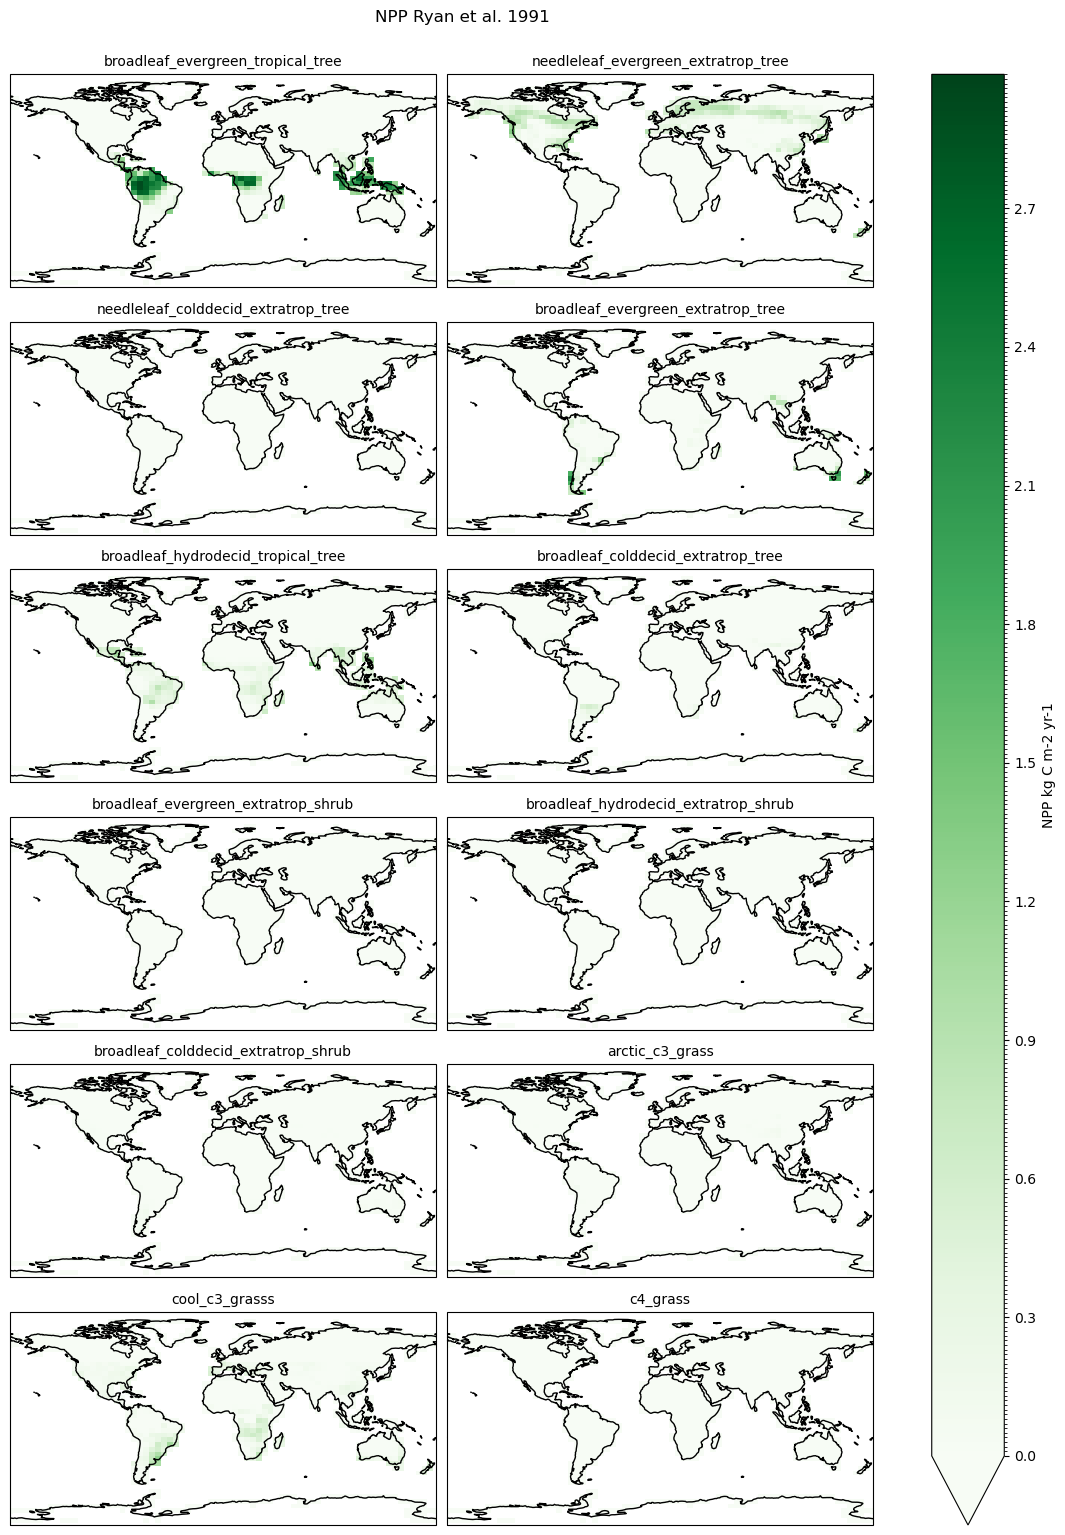

In [5]:
default = fates_def.FATES_NPP_PF.isel(time=slice(tave_start,tave_stop)).mean(dim='time') * 86400 * 365 

g = default.plot(x="lon",y="lat",col="fates_levpft", col_wrap=2, 
           figsize=(12, 15),
      cbar_kwargs={"label": "NPP kg C m-2 yr-1"},
      subplot_kws={"projection":ccrs.PlateCarree(),"facecolor":"white"},
          levels = np.arange(0,3.0,0.01), cmap='Greens',
            facecolor="white")

for i, ax in enumerate(g.axes.flat):
    ax.set_title(pfts[i], fontsize=10)

[ax.coastlines() for ax in g.axes.flatten()]

# Add a big title at the top
plt.suptitle('NPP Ryan et al. 1991', y=1.02, x = 0.45)
;

### NPP by pft - Atkin et al. 2017

''

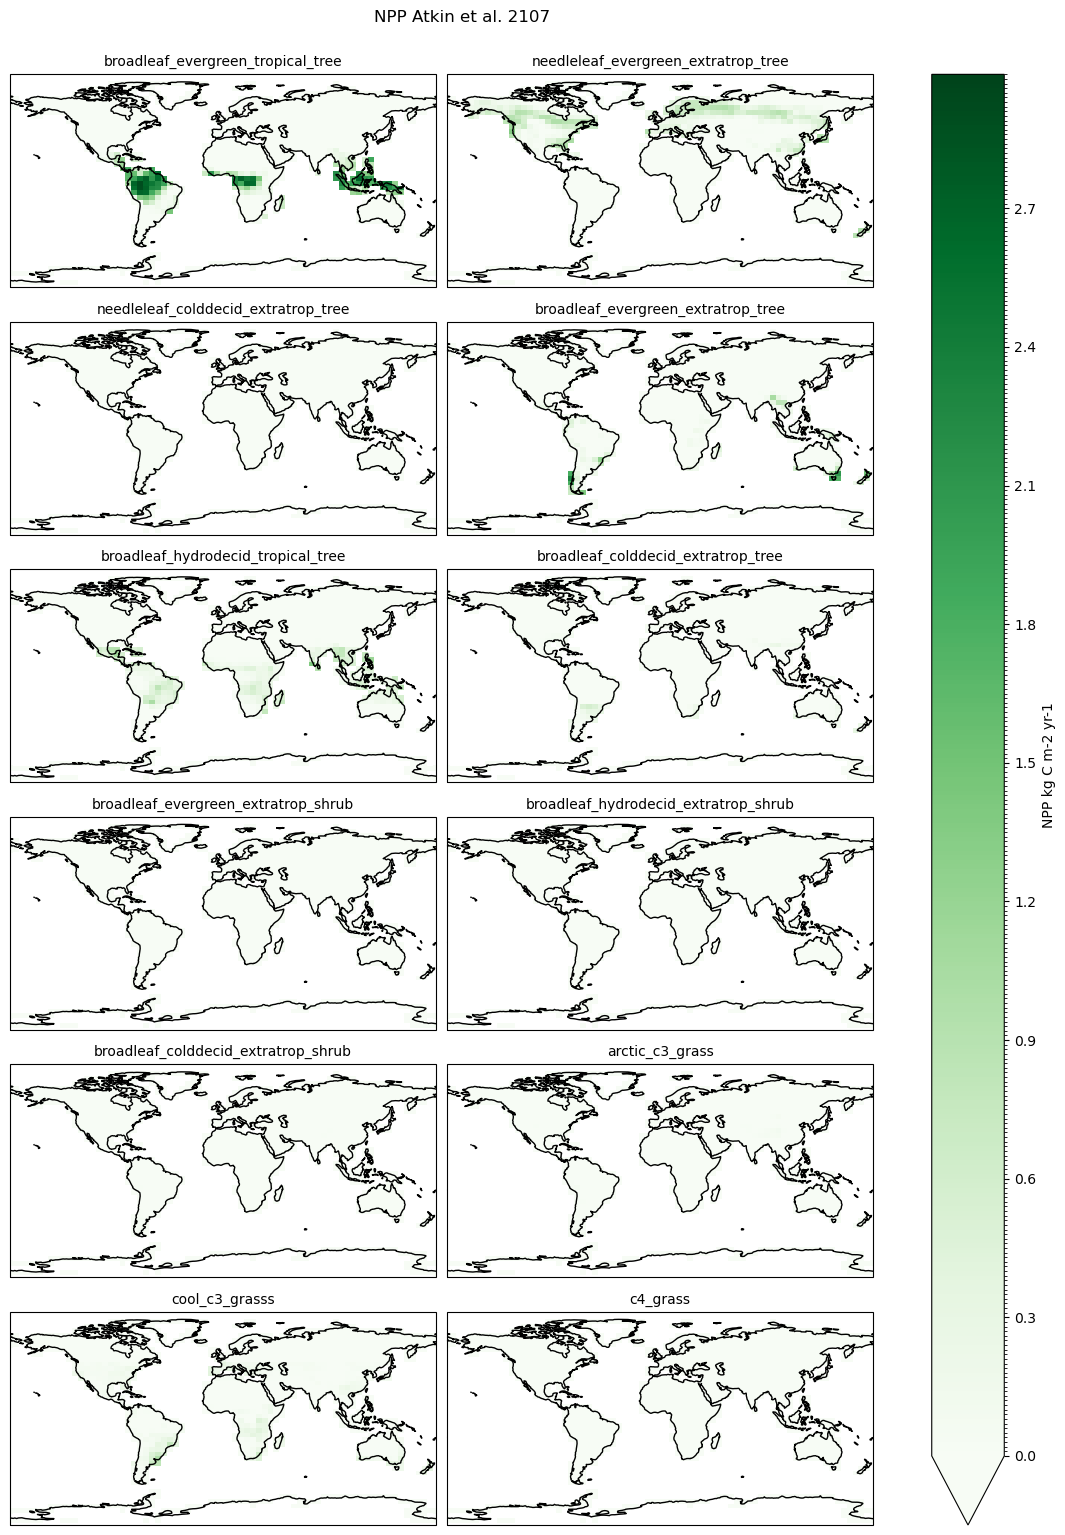

In [6]:
new = fates_new.FATES_NPP_PF.isel(time=slice(tave_start,tave_stop)).mean(dim='time') * 86400 * 365 

g = new.plot(x="lon",y="lat",col="fates_levpft", col_wrap=2, 
           figsize=(12, 15),
      cbar_kwargs={"label": "NPP kg C m-2 yr-1"},
      subplot_kws={"projection":ccrs.PlateCarree(),"facecolor":"white"},
          levels = np.arange(0,3.0,0.01), cmap='Greens',
            facecolor="white")

for i, ax in enumerate(g.axes.flat):
    ax.set_title(pfts[i], fontsize=10)

[ax.coastlines() for ax in g.axes.flatten()]

# Add a big title at the top
plt.suptitle('NPP Atkin et al. 2107', y=1.02, x = 0.45)
;